In [1]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import librosa
from matplotlib.pyplot import plot, stem, figure, show
import glob

In [35]:
def measure_pitch(audio_path: str) -> float:
    f0min, f0max = [100, 300]
    
    sound = parselmouth.Sound(audio_path) # read the sound
    pitch = call(sound, "To Pitch", 0, f0min, f0max) #create a praat pitch object
    mean_pitch = call(pitch, "Get mean", 0, 0, "Hertz") # get mean pitch
    return mean_pitch, pitch

def pitch_marker(aud_file, PITCH_INTERVAL=10, CONV_SIZE=12):
    dur = librosa.get_duration(filename=aud_file)
    p_mean, p_obj = measure_pitch(aud_file)
    step_div = 10
    L = int(dur) * step_div
    pitches_time = np.linspace(0, dur, dur * PITCH_INTERVAL)
    pitches_val = np.array([p_obj.get_value_at_time(t) for t in pitches_time])
    pitches_val[np.isnan(pitches_val)] = 0
    win = np.hamming(CONV_SIZE)
    pitches_mvg = np.convolve(pitches_val, win, mode="same")
    pitches_thr = (pitches_mvg > np.max(pitches_mvg) / 2).astype(int)

    return pitches_time, pitches_val, pitches_mvg, pitches_thr

def get_pitch_bounds(aud_file, do_plot=True, MIN_PITCH_DUR=1):
    print("Audio File Path: ", aud_file)
    pitches_time, _, _, pitches_thr = pitch_marker(aud_file)


    # Find sudden change in pitch_array[boolean] (first difference)
    pitches_thrp_1 = np.abs(pitches_thr[1:] - pitches_thr[:-1])

    # Time marks where pitch shifts occurs
    pitches_timep = pitches_time[np.nonzero(pitches_time[: -1] * pitches_thrp_1)]

    # Duration of shift intervals
    pitches_timep_dur = pitches_timep[1:] - pitches_timep[:-1]
    pitches_timep_dur = pitches_timep_dur[::2]

    # Discard mismarks where interval < MIN_PITCH_DUR
    mismarks = np.flatnonzero(pitches_timep_dur < MIN_PITCH_DUR)
    mismarks = np.concatenate((mismarks * 2, (mismarks * 2) + 1))
    pitches_timep[mismarks] = 0

    # Pitch boundaries timestamps
    pitches_time_axis = pitches_timep[pitches_timep > 0]


    if do_plot:
        # Plot
        figure()

        sig, fs = librosa.load(aud_file, sr=None) # load signal
        time_axis = np.linspace(0, len(sig)/fs, len(sig))

        plot(time_axis, sig) # plot signal

        stem(pitches_time_axis, np.ones(len(pitches_time_axis))/8, "r") # stem pitch boundaries

        show()

    return pitches_time_axis

In [33]:
AUDIO_DATA_PATH_WAV = "/home/jeevan/Desktop/PNOI_DATA_WAV"

In [34]:
aud_files = glob.glob(f"{AUDIO_DATA_PATH_WAV}/*/*/*darshan*LBA*.wav"); aud_files

['/home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_RL-93b1-comnt.wav',
 '/home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_RU-216d-comnt.wav',
 '/home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_LU-86f2-comnt.wav',
 '/home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_LL-154f-comnt.wav']

Audio File Path:  /home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_RL-93b1-comnt.wav


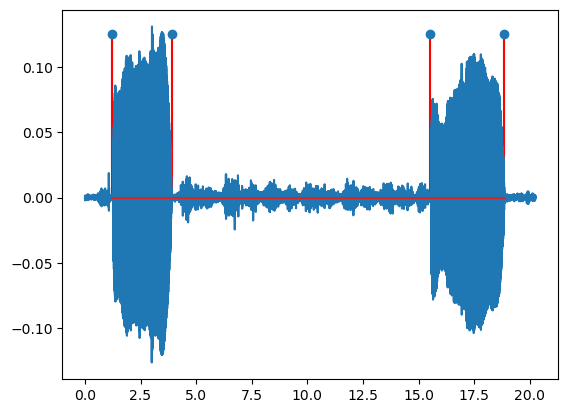

[ 1.21026866  3.93337313 15.53178109 18.8600199 ]
Audio File Path:  /home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_RU-216d-comnt.wav


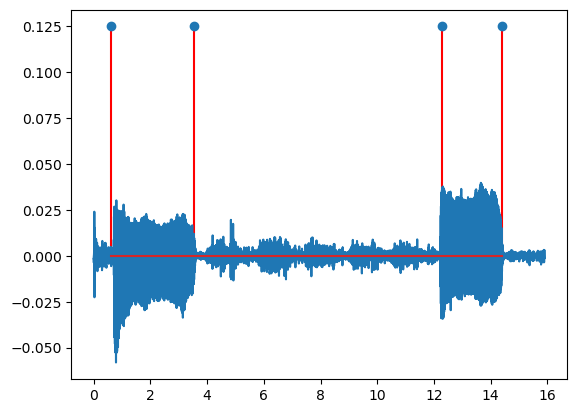

[ 0.60394937  3.52303797 12.2803038  14.39412658]
Audio File Path:  /home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_LU-86f2-comnt.wav


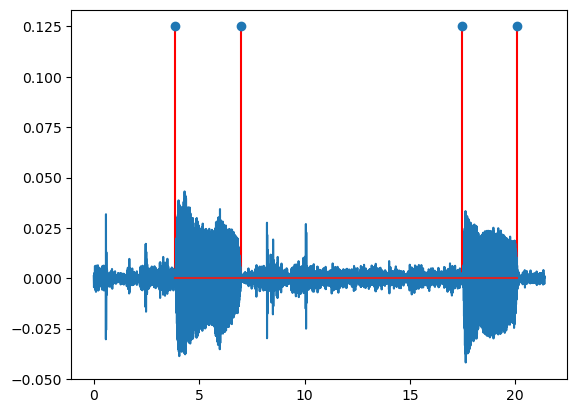

[ 3.83441509  6.96249057 17.45667925 20.08022642]
Audio File Path:  /home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_feb2023/darshanvshettar_843c416b/pnoistor_feb2023-darshanvshettar_843c416b-LBA_before_LL-154f-comnt.wav


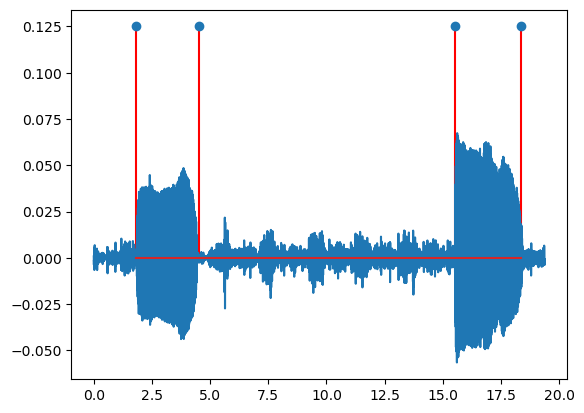

[ 1.8165      4.54125    15.54116667 18.36683333]


In [37]:
for af in aud_files[:]:
    pitch_bounds = get_pitch_bounds(af, do_plot=True)
    print(pitch_bounds)

Audio File Path:  /home/jeevan/Desktop/PNOI_DATA_WAV/audio-data_dec01/sagarkumar_b77e6507/pnoistor_dec01-sagarkumar_b77e6507-LBA_before_LU-dbb1-comnt.wav


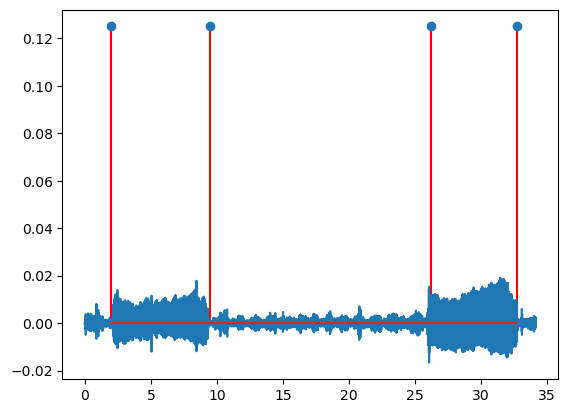

[ 2.00941176  9.44423529 26.22282353 32.75341176]


In [19]:
MIN_PITCH_DUR = 1
for af in aud_files[:]:
    print("Audio File Path: ", af)
    pitches_time, pitches_val, pitches_mvg, pitches_thr = pitch_marker(af)


    # Find sudden change in pitch_array[boolean] (first difference)
    pitches_thrp_1 = np.abs(pitches_thr[1:] - pitches_thr[:-1])

    # Time marks where pitch shifts occurs
    pitches_timep = pitches_time[np.nonzero(pitches_time[: -1] * pitches_thrp_1)]

    # Duration of shift intervals
    pitches_timep_dur = pitches_timep[1:] - pitches_timep[:-1]
    pitches_timep_dur = pitches_timep_dur[::2]

    # Discard mismarks where interval < MIN_PITCH_DUR
    mismarks = np.flatnonzero(pitches_timep_dur < MIN_PITCH_DUR)
    mismarks = np.concatenate((mismarks * 2, (mismarks * 2) + 1))
    pitches_timep[mismarks] = 0

    # Pitch boundaries timestamps
    pitches_time_axis = pitches_timep[pitches_timep > 0]


    # Plot
    figure()

    sig, fs = librosa.load(af, sr=None) # load signal
    time_axis = np.linspace(0, len(sig)/fs, len(sig))

    plot(time_axis, sig) # plot signal

    stem(pitches_time_axis, np.ones(len(pitches_time_axis))/8, "r") # stem pitch boundaries

    show()

    print(pitches_timep)

    break